In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram
%matplotlib inline

In [2]:
encoded_numberer = '11010'

In [3]:
def detector(circuit, number):
    for idx in range(len(number)):
        if number[idx] == '0':
            circuit.x(idx)

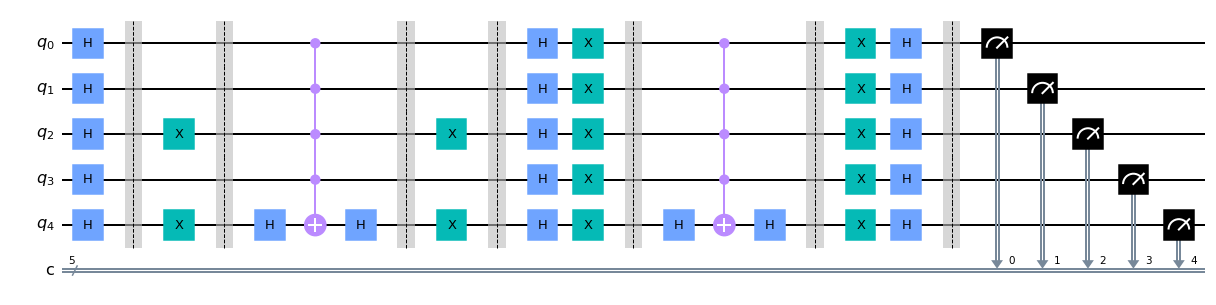

In [4]:
n_qubits = len(encoded_numberer)

qc = QuantumCircuit(n_qubits,n_qubits)

qc.h(range(n_qubits))
qc.barrier()

# start oracle
detector(qc, encoded_numberer)

qc.barrier()
qc.h(n_qubits - 1)
qc.mct(list(range(n_qubits - 1)), n_qubits - 1)
qc.h(n_qubits - 1)
qc.barrier()

detector(qc, encoded_numberer)
# end oracle

# diffusion amplification
qc.barrier()
qc.h(range(n_qubits))
qc.x(range(n_qubits))

qc.barrier()
qc.h(n_qubits - 1)
qc.mct(list(range(n_qubits - 1)), n_qubits - 1)
qc.h(n_qubits - 1)

qc.barrier()

qc.x(range(n_qubits))
qc.h(range(n_qubits))
# end diffusion amplification

qc.barrier()

qc.measure(range(n_qubits), range(n_qubits))
qc.draw(output='mpl')

In [5]:
# simulators
statevec_sim = qiskit.Aer.get_backend("statevector_simulator")
qasm_sim = qiskit.Aer.get_backend("qasm_simulator")

In [6]:
sim_state_vector = qiskit.execute(qc, backend=statevec_sim).result().get_statevector()
sim_counts = qiskit.execute(qc, backend=qasm_sim, shots=1024).result().get_counts()

{'01110': 22, '01000': 26, '01111': 15, '00110': 20, '00100': 23, '00011': 38, '01010': 20, '10001': 18, '11001': 25, '10101': 22, '10000': 34, '11100': 32, '11110': 26, '00010': 22, '00101': 23, '01001': 27, '01100': 20, '00000': 32, '01011': 253, '00111': 23, '10100': 27, '11101': 25, '10111': 25, '11000': 22, '10011': 29, '00001': 27, '01101': 33, '11010': 17, '11111': 16, '10110': 22, '10010': 25, '11011': 35}


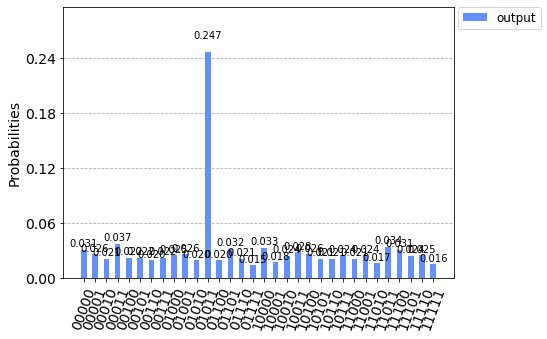

In [7]:
print(sim_counts)
plot_histogram([sim_counts], legend=['output'])

In [8]:
import qiskit.quantum_info as qi
rho_H = qi.DensityMatrix(sim_state_vector)
rho_H.draw('latex', prefix='\\rho_H = ')

<IPython.core.display.Latex object>